**Task 1a)** 
Data is appended as data_problem1.csv. Load the data and report general information of the data.
Additionally plot (as histograms) the data and discuss the separability

Shape of the data (2, 3600)
Number of samples with labels (0,1): (1600,2000)


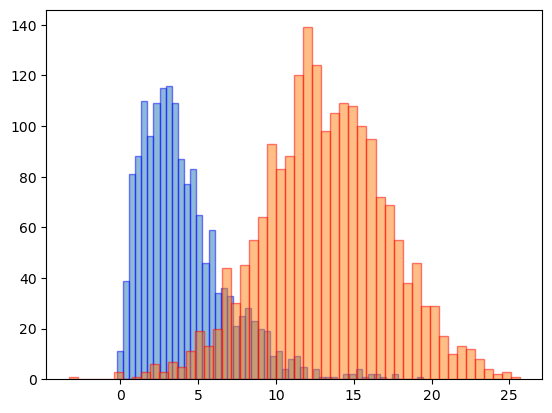

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Assignment2/data_problem1.csv", delimiter=",", dtype=float)
print("Shape of the data", data.shape)

x = data[0,:]
y = data[1,:]
x0 = x[y==0]
x1 = x[y==1]
print(f"Number of samples with labels (0,1): ({len(x0)},{len(x1)})")


plt.hist(x0, bins=50, edgecolor='blue', alpha=0.5)
plt.hist(x1, bins=50, edgecolor='red', alpha=0.5)
plt.show()


**Task 1c)**
Split the data into training and test data. Use the maximum likelihood estimations to estimate the
parameters based on the training data. Use the point-estimations of the parameters to implement a Bayes’
classifier. Report the test accuracy.

In [53]:
from numpy import pi, sqrt, exp

def gaussian_likelihood(x, mean, std_dev):
    return (1 / (sqrt(2 * pi) * std_dev)) * exp(-0.5 * ((x - mean) / std_dev)**2)

def gamma_likelihood(x, beta):
    # Assuming alpha=2 and x>0
    likelihood = (beta**2 * x * np.exp(-beta*x))
    return likelihood
    
def MLE(x_0, x_1):
    mu_1 = np.mean(x_1)
    sigma_1 = np.std(x_1)
    beta_0 = np.mean(x_0)/2
    return beta_0, mu_1, sigma_1

# Ignoring the scale factor consisting of the sum of probabilities in the denominator
def classify_gamma(prior, x, beta):
    return prior*gamma_likelihood(x, beta)

def classify_gauss(prior, x, mu, std):
    return prior*gaussian_likelihood(x, mu, std)
        
# Randomize data order (without stratification support)
random_indexes = np.random.permutation(len(x))
x = x[random_indexes]
y = y[random_indexes]


# Split in train/test set:
split_index = int(0.8*len(x))
x_train = x[:split_index]
y_train = y[:split_index]
x0_train = x_train[y_train==0]
x1_train = x_train[y_train==1]

x_test = x[split_index:]
y_test = y[split_index:]

beta0, mu1, sigma1 = MLE(x0_train, x1_train)
prior_0 = len(x0_train)/len(x_train)
prior_1 = len(x1_train)/len(x_train)

posteriors_0 = classify_gamma(prior_0, x_test, beta0)
posteriors_1 = classify_gauss(prior_1, x_test, mu1, sigma1)

decisions = posteriors_0 < posteriors_1
ground_truth = y_test == 1

accuracy = len(decisions[decisions == ground_truth])/len(decisions)
print("Accuaracy: ", accuracy)


Accuaracy:  0.8069444444444445
